-----
# 1. Corner Detection
-----

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
def display(image, mode = 'RGB'):
    fig = plt.figure(figsize = (4,10))
    ax = fig.add_subplot(111)
    if mode == 'RGB':
        ax.imshow(image); plt.show()
    elif mode == 'gray':
        ax.imshow(image, cmap = 'gray'); plt.show()
    else:
        raise ValueError ('Input Mode Salah')

**Catur Datar**

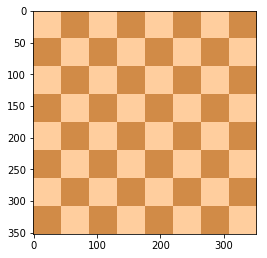

In [11]:
catur_datar = cv2.imread("DATA/flat_chessboard.png")
catur_datar = cv2.cvtColor(catur_datar, cv2.COLOR_BGR2RGB)
display(catur_datar)

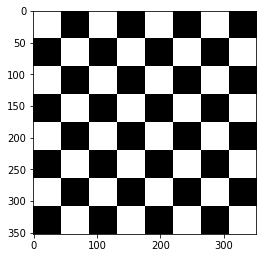

In [18]:
catur_datar_gray = cv2.cvtColor(catur_datar, cv2.COLOR_RGB2GRAY)
display(catur_datar_gray, mode = 'gray')

**Catur Asli**

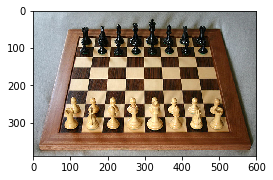

In [19]:
catur_asli = cv2.imread('DATA/real_chessboard.jpg')
catur_asli = cv2.cvtColor(catur_asli, cv2.COLOR_BGR2RGB)
display(catur_asli)

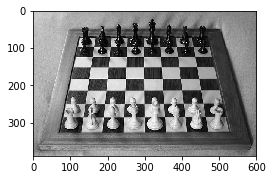

In [20]:
catur_asli_gray = cv2.cvtColor(catur_asli, cv2.COLOR_RGB2GRAY)
display(catur_asli_gray, mode = 'gray')

# Harris Corner Detection


**cornerHarris Function**

*  src Input single-channel 8-bit or floating-point image.
*  dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .
*  blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).
*  ksize Aperture parameter for the Sobel operator.
*  k Harris detector free parameter. See the formula in DocString
*  borderType Pixel extrapolation method. See #BorderTypes.

-----
# 8. Face Detection
-----

In [22]:
murad = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)

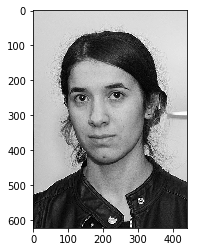

In [31]:
plt.imshow(murad, cmap = 'gray')

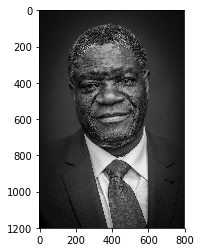

In [26]:
plt.imshow(denis, cmap = 'gray')

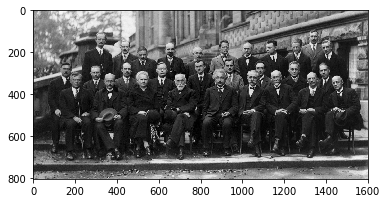

In [27]:
plt.imshow(solvay, cmap = 'gray')

In [45]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [64]:
def detect_face(img):
    gambar_muka = img.copy()
    face_rects = face_cascade.detectMultiScale(gambar_muka)
    #print(face_rects)
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(gambar_muka, pt1 = (x,y),
                      pt2 = (x+w, y+h), color = (255,255,255),
                      thickness = 10)
    return gambar_muka

[[ 55 141 276 276]]


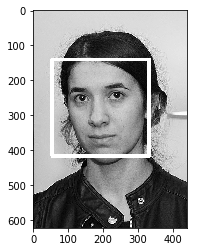

In [60]:
plt.imshow(detect_face(murad), cmap = 'gray')

[[131 187 515 515]]


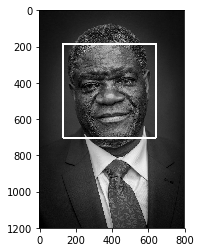

In [61]:
plt.imshow(detect_face(denis), cmap = 'gray')

[[ 430  318   34   34]
 [ 912  245   55   55]
 [ 766  248   57   57]
 [ 586  256   63   63]
 [1058  257   56   56]
 [1315  107   51   51]
 [ 300  121   52   52]
 [1300  303   62   62]
 [ 182  312   55   55]
 [ 498  308   61   61]
 [ 668  310   70   70]
 [ 336  317   62   62]
 [ 269  250   61   61]
 [ 131  261   55   55]
 [ 421  259   59   59]
 [1419  324   57   57]
 [1216  258   65   65]
 [1320  375   32   32]
 [1360  266   57   57]
 [ 272  277   57   57]
 [ 673  363   63   63]
 [ 413  155   54   54]
 [1371  157   56   56]
 [1231  160   46   46]
 [ 896  158   51   51]
 [ 994  165   53   53]
 [ 629  166   57   57]
 [1101  161   51   51]
 [1130  295   64   64]
 [ 843   58   28   28]
 [ 766  186   53   53]
 [ 496  194   55   55]
 [1020  301   58   58]
 [ 863  301   60   60]]


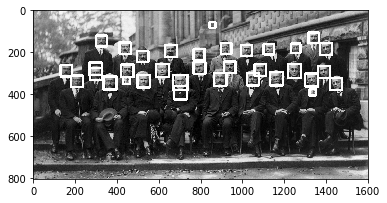

In [62]:
plt.imshow(detect_face(solvay), cmap = 'gray')

In [66]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Webcam Face Detection', frame)
    
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()